In [194]:
from brian2 import *
%matplotlib inline

In [203]:
def perform_single_neruon_test(b, I):
    start_scope()

    tau = 1*ms

    eqs = '''
    dv/dt = ((0.04*v**2)/mV + 5*v + 140*mV - u + I*ohm)/tau : volt
    du/dt = a * (b*v - u)/tau : volt
    I : amp
    '''

    a = 0.0275; # b = b;
    c = -65*mV; d = 8*mV

    G = NeuronGroup(1, eqs, threshold='v>=30*mV', reset='''v=c; u=u+d''', method='euler')
    G.v[0] = -65*mV
    G.I[0] = I*mA

    statemon_v = StateMonitor(G[:], 'v', record=True)
    statemon_u = StateMonitor(G[:], 'u', record=True)
    spikemon = SpikeMonitor(G[:], variables='v')

    run_time = 1000
    run(run_time*ms)

    # create spike plots
    figure(figsize=(9, 4))
    for l in range(11):
        axvline(l*int(run_time/10), ls='--', c='k')
    axhline(30, ls='-', c='lightgray', lw=3)
    plot(statemon_v.t/ms, statemon_v.v.T/mV, '-', label='v')
    plot(statemon_u.t/ms, statemon_u.u.T/mV, '-', label='u')
    xlabel('Time (ms)')
    ylabel('v (mV)');

    output_rates = spikemon.num_spikes/(run_time*ms)
    print("avg. network firing rate: ", output_rates)

avg. network firing rate:  0. Hz


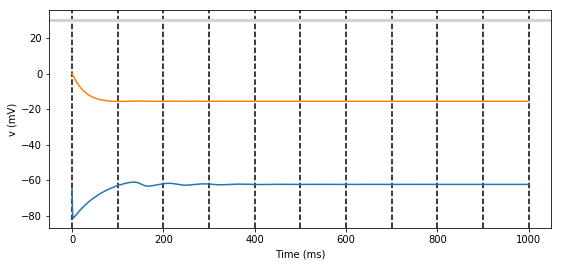

In [224]:
perform_single_neruon_test(b=0.25, I=0.65)

avg. network firing rate:  5. Hz


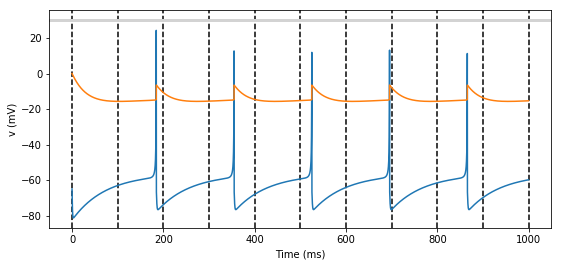

In [205]:
perform_single_neruon_test(b=0.25, I=0.6658)

avg. network firing rate:  0. Hz


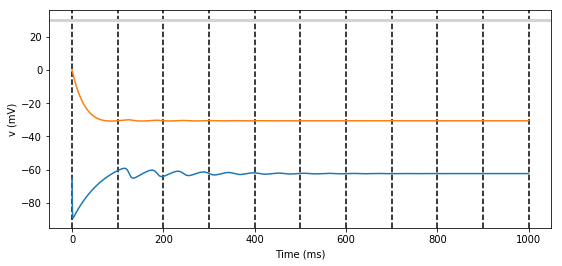

In [226]:
perform_single_neruon_test(b=0.49, I=-14.3)

In [ ]:
perform_single_neruon_test(b=0.49, I=0)